# Wine quality

This is a classification project, here we have as main objective to classify, quantitatively, the importance of each characteristic regarding the quality of the wines, which after evaluation received a grade from 3 to 8. Therefore, machine learning methodologies were used to create an automatic classifier. 

## Problem introducion

Professionals who dedicate their lives to wine tasting and experimentation rely on three steps – visual, olfactory and gustatory examination – to analyze the drink and define what a good wine is.
These parameters are technical judgment criteria and do not match a consumer's personal assessment. In practice, they work as follows:
    
- Visual: in the first stage of the technical analysis of a wine, aspects such as clarity, brightness, color tone, among others, are evaluated.
    
- Olfactory: the intensity, its sharpness and the possible presence of defects are evaluated in the aroma. Sharpness means how easily the wine's aroma is perceived.
    
- Gustatory: finally, the wine is evaluated on the palate. An aspect of great importance is the balance between the flavors. The acidity must be in accordance with the alcohol content and the intensity of tannins of the wine. Another very important aspect is gustatory clarity, that is, the taste of the wine must match the sensation experienced by the taster when smelling the sample.

But as all these parameters are qualitatively defined by the professional's experience, the model proposes a more quantitative analysis through the chemical analysis of each wine. In this way, we can classify the aspects and know what are the main factors to take into account when making a good wine, thus focusing on the chemical factors that have greater relevance for a higher quality wine.

## Import libraries 

For this project is necessary utilizate the five libraries describe bellow, where each one have your pursose.
- Pandas - For modeling data, tranforming matrixes, list or arrays in dataframe (something like tables of Excel).
- Numpy - Perform calculations on single or multidimensional arrays in a simple way.
- Matplotlib and Seaborn - Libraries utilizate to data visualization with graphs, enabling data analyse and understanding the problem, enabling the creation of a solution.
- Sklearn - Library to work with Machine Learning, with it several methods, algorithms and very interesting techniques are already implemented that simplify 

In [85]:
# Perform calculations on multidimensional arrays 
import numpy as np

# Data modeling
import pandas as pd

# For lead time
import time

# Plotting graphics 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Model performance analysis
from sklearn import metrics

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Model trainer and parameter finder for an estimator
from sklearn.model_selection import train_test_split, GridSearchCV

## Data Exploration

### Data acquisition

Using Pandas it is possible to read a .CSV file and transform our database into a dataframe, being able to perform data modeling later.
In this case, a facilitator is the presence of a column with the encoding of each wine in the read file (Id), so it is possible to use this column as an index of the dataframe.

In [86]:
data = pd.read_csv('WineQT.csv',index_col='Id')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data Analyse

First, to understand the database studied, it is important to check which variables are studied and if they all have the same amount of information. Because, if you don't have it, it is necessary to carry out the processing of the data to continue with the activities.
Fortunately, in this case it will not be necessary, as we find 12 columns with the same amount of information.

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


In [88]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


After using .decribe(), which has the function of demonstrating the main characteristics of each DataFrame column, we can already see some things, such as:
- Primary statistical data that already give an idea of ​​each variable
- Variation in the magnitude of each variable

To understand the relationship between the variables a little better, we can use pairplot() to perform this visualization.

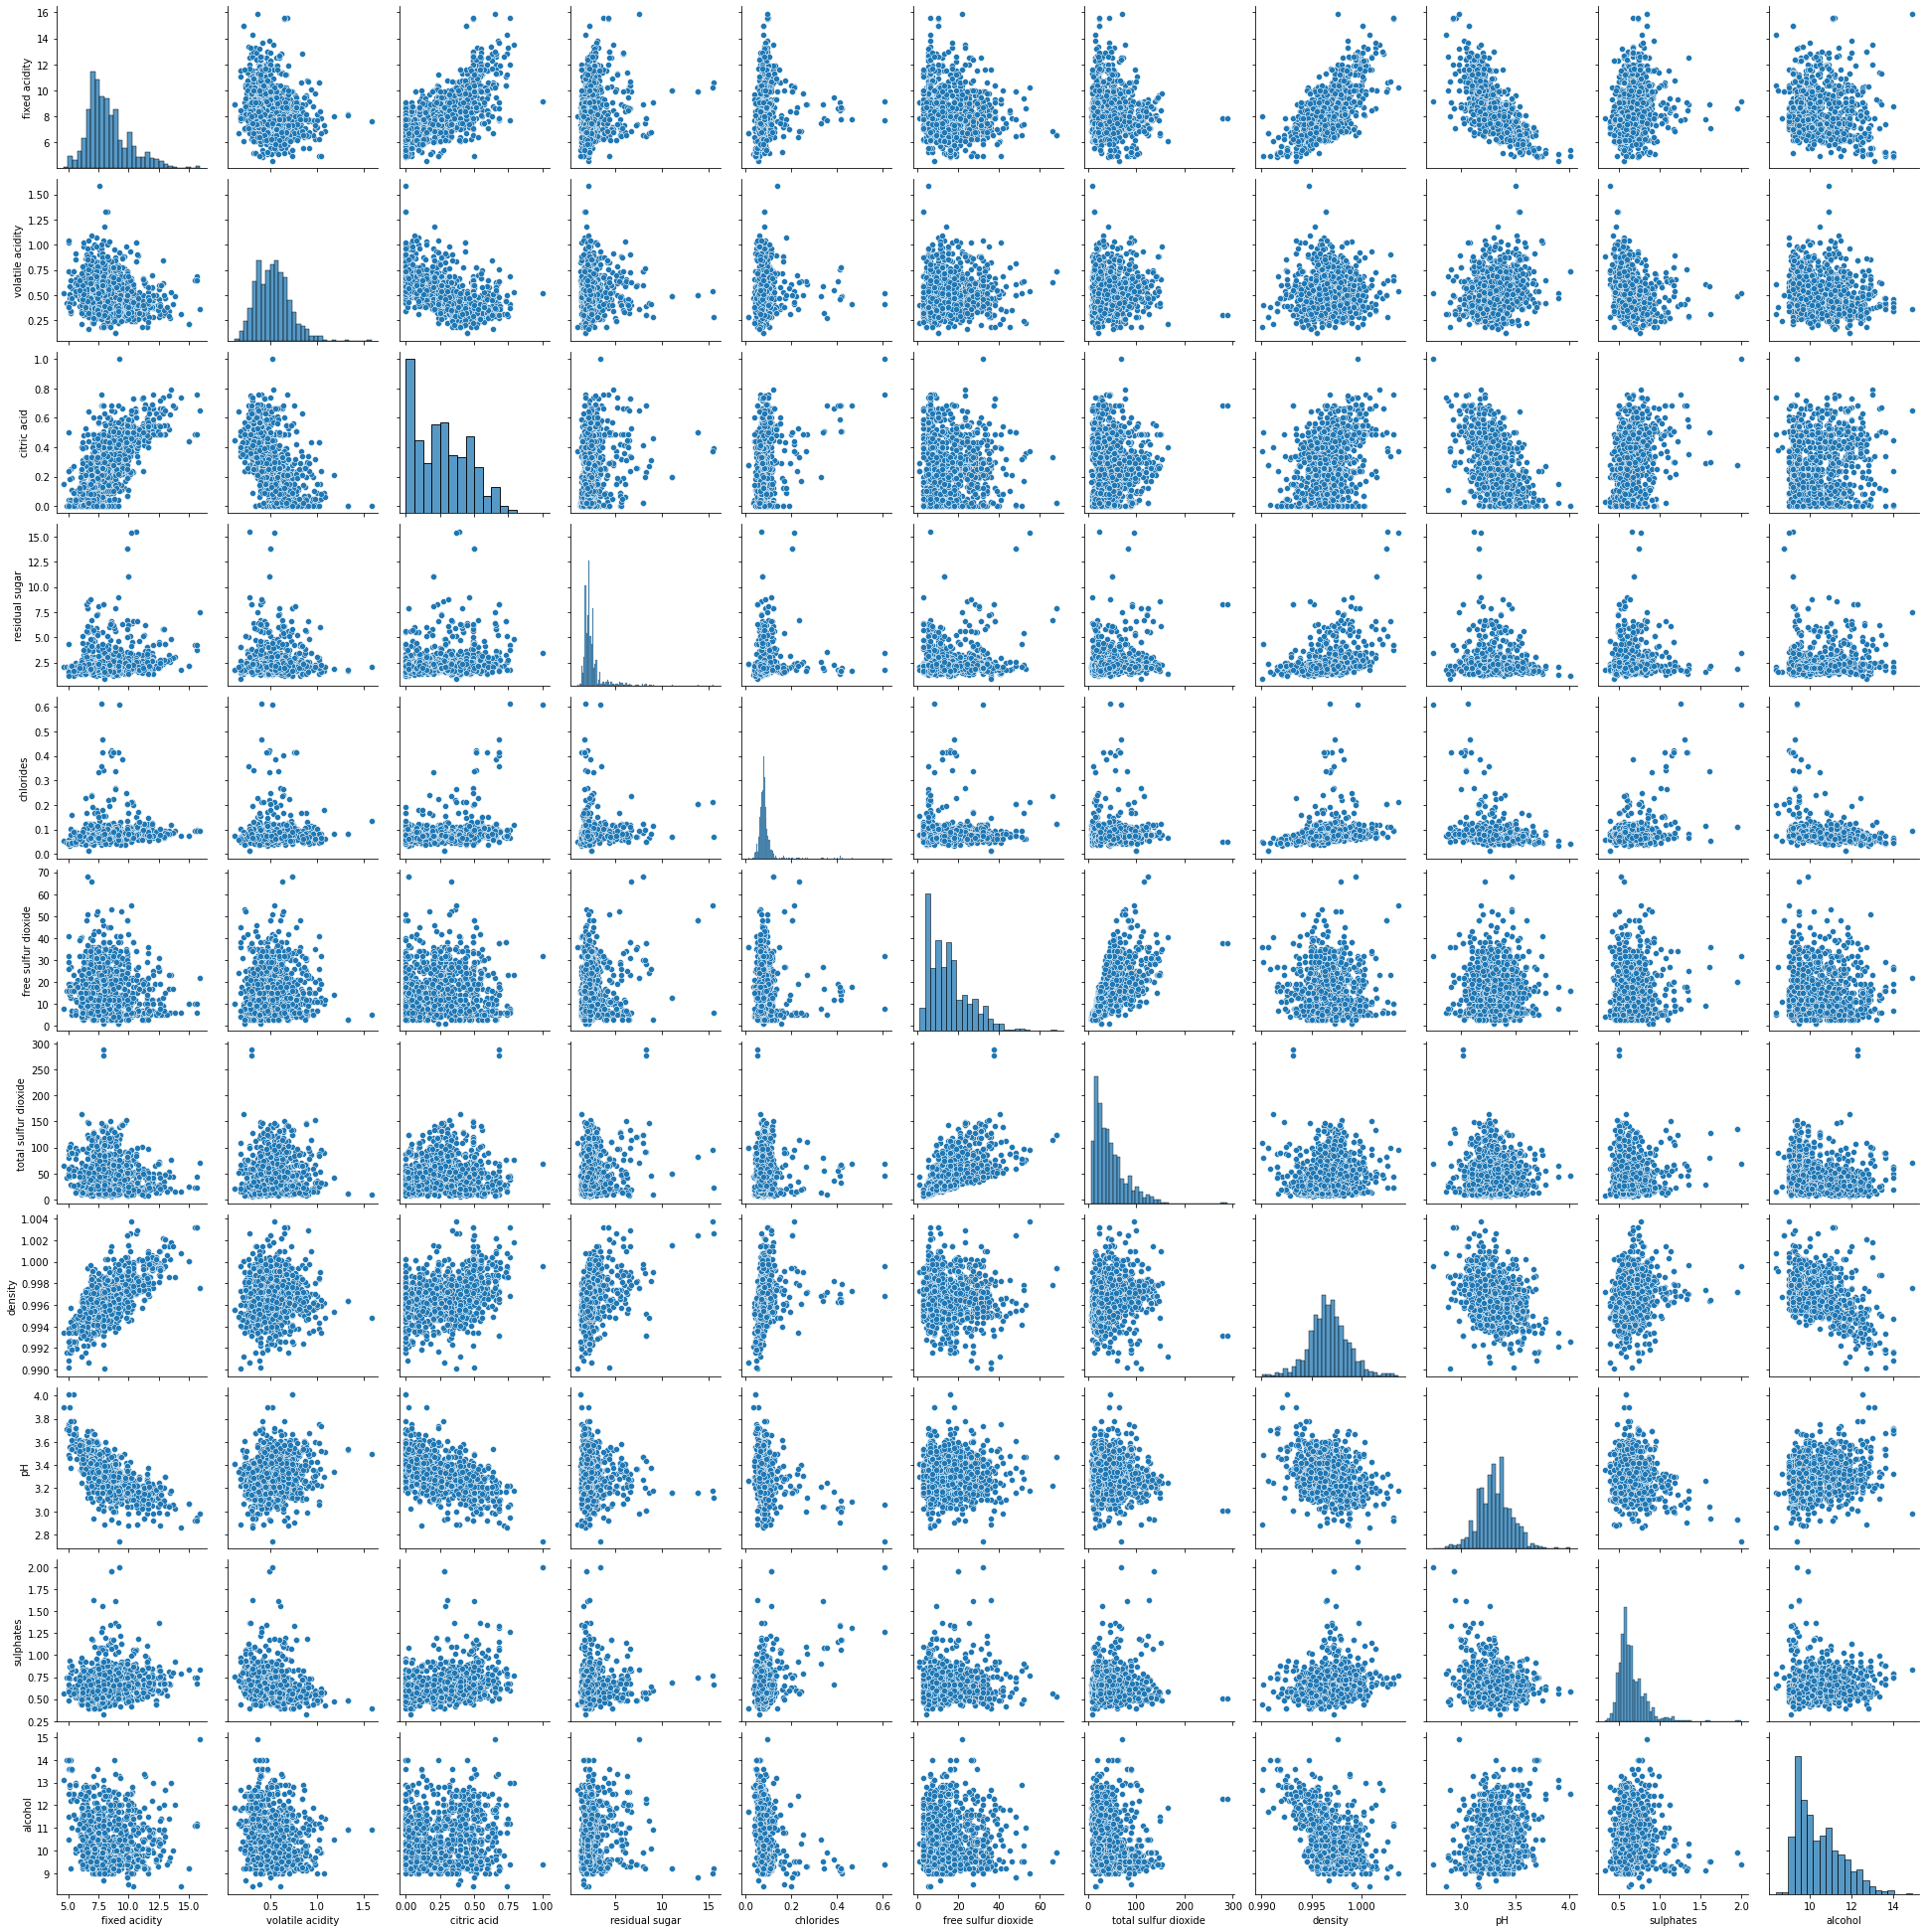

In [89]:
sns.pairplot(data.drop(['quality'],axis=1))
plt.show()

We can see that the distributions are quite difficult to analyze, since they demonstrate great asymmetry like chlorides and have different types of distribution. And, analyzing graph by graph to find some kind of relationship between them, trying, in a visual way, to classify the variables, is an exhaustive and unreliable way, since we will have a totally qualitative and not quantitative analysis.

Another important chart for exploratory data analysis is a correlation matrix that will display the correlations between features.

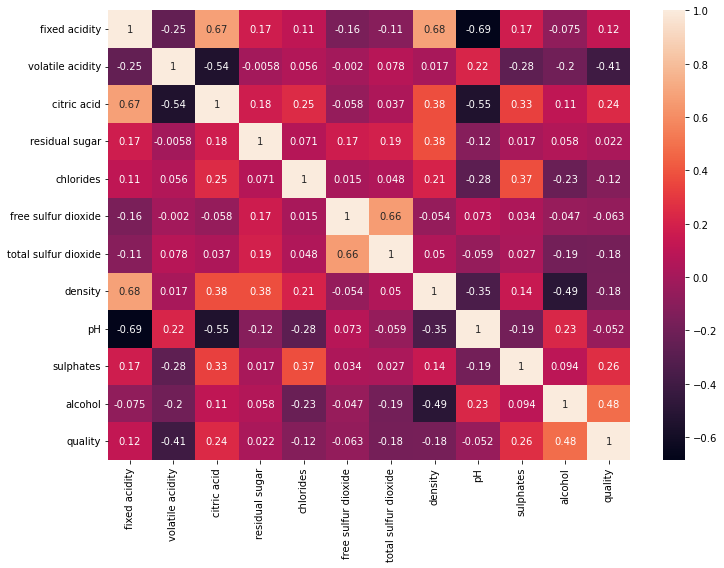

In [90]:
rcParams['figure.figsize'] = 11.7,8.27
sns.heatmap(data.corr(),xticklabels=data.columns,yticklabels=data.columns,annot=True)
plt.show()

With this graph it is possible to identify the correlation between the variables, that is, if they have some type of association or statistical relationship between them.

In the first analysis, it is possible to notice that values between -1 and 1 were found, that is, the closer to 1, it means that the variables have extreme statistical correlation, but, for values ​​close to -1, it is possible to identify antagonistic variables among themselves. , that is, the variables have the opposite behavior, if one increases, the other tends to decrease, and vice versa.

In relation to the graphic demonstration above, by the legend of the graphic it is possible to interpret that the brighter the quadrants, the higher the correlation level, and the darker, the lower. But even so, to make it easier, the values were plotted to the quadrant, making it easier to read.

### Data Preparation

For the set of variables of a distinct set, different the resource to find the necessary degree of development, the variable answer, that is, a variable used as a template for applied methodology.

In [91]:
# Putting feature variable to feat
feat = data.drop(['quality'],axis=1)

# Putting response variable to resp
resp = data['quality']

There is a final data preparation step: splitting the data into training and testing sets at random.

During training, we let the model use the responses, in this case the quality of the viho, so that it can learn how to predict the quality from the resources. We expect that there is some relationship between all resources and the target value, so the model's job is to learn this relationship from training.
So, after this training, it is necessary to evaluate the model, so we ask it to make predictions in a test suite where it only has access to the features (not the answers)! In this way, we have the real answers for the test set, thus being able to compare the predictions with the real value (gauge) evaluating the accuracy of the model.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(feat, resp, train_size=0.7) #0.7 literatura padrão
X_train.shape, X_test.shape

((800, 11), (343, 11))

## Building a classifier

### What is Random Forest?

We will use the Random Forest method, easily implemented by sklearn

Random forest is a method known as supervised learning, which means that there are labels and mappings between our inputs and outputs. It can be used for classification tasks like determining a flower's species based on measures like petal length and color, or it can be used for regression tasks like predicting tomorrow's weather forecast based on historical weather data. , in our case, we will use chemical analysis data (like pH, free sulfur dioxide, total sulfur dioxide and density) of the wines evaluated previously.

A random forest - as the name suggests - consists of several decision trees, each of which produces a prediction, i.e. when performing a classification task, each decision tree in the random forest votes for one of the classes to which the input belongs. For example, if in our dataset we want to implement the technique to determine the quality of a wine, in this case the decision trees in a random forest will each vote for which quality they think the wine belongs to. This way, after all the trees have reached a conclusion, the random forest will count which class (quality) had the most populous vote, this class being the random forest it will produce as a prediction.

The random forest algorithm can be described as follows:

- Let's say the number of observations is N. These N observations will be randomly sampled with replacement.
- Let's say there are M features or input variables. A number m, where m < M, will be randomly selected at each node from the total number of features, M. The best division of these m variables is used to divide the node and this value remains constant as the forest grows.
- Every decision tree in the forest is cultivated to its greatest extent.
- The forest will produce a forecast based on the aggregated forecasts of the trees in the forest. (Or majority vote or average)

### Random Forest Apliccation

Now that the data has been prepared, you can build and train the random forest model.

In [93]:
#Create a model
model = RandomForestClassifier()
#train the model
model.fit(X_train, y_train)

RandomForestClassifier()

With the model trained to learn the relationships between resources and destinations, the next step is to find out how good the model is.

To do this, it is necessary to create predictions about the test features and then compare the predictions with the already known answers, being able to calculate the accuracy of our model.

In [94]:
y_pred=model.predict(X_test)

# Accuracy
acc = (metrics.accuracy_score(y_test, y_pred))*100

print("Accuracy: {:.4}%".format(acc))

Accuracy: 63.56%


After all this process, it was possible to create a classification model with an accuracy of 66.18%, that is, statistically, our model managed to classify our variables in such a way that it managed to correctly predict the quality of 2 out of 3 wines.

This may seem like a good parameterization, but no optimization was performed in the code, so it is possible to improve this score.

## Method optimization

To facilitate the classification, we can discretize the response variable for a binary evaluation, using 0 for wines with quality less than median and 1 for wines with quality equal to or greater than 6. In this way, this helps to optimize Random Forest, as in this case, we will have a decrease in tree decisions.

In [95]:
rating_pctile = np.percentile(data['quality'], 50)
data['n_rating'] = 0
data['n_rating'] = np.where(data['quality'] < rating_pctile, 0, data['n_rating'])
data['n_rating'] = np.where(data['quality'] >= rating_pctile, 1, data['n_rating'])
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,n_rating
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,0.543307
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,0.498339
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


Run the code again

In [96]:
# Putting feature variable to feat
feat = data.drop(['quality','n_rating'],axis=1)

# Putting response variable to resp
resp = data['n_rating']

X_train, X_test, y_train, y_test = train_test_split(feat, resp, train_size=0.7) #0.7 literatura padrão

#Create a model
model = RandomForestClassifier()

#train the model
model.fit(X_train, y_train)

#Predict
y_pred=model.predict(X_test)

# Accuracy
acc = (metrics.accuracy_score(y_test, y_pred))*100

print("Accuracy: {:.4}%".format(acc))

Accuracy: 76.97%


With this simple change, it is possible to identify a jump of approximately 20% in accuracy, demonstrating a much more reliable model.

But more improvements are possible in the code, so we can look for the best possible input parameters, starting with the number of estimators, that is, the number of interactions/branches in the tree. It's easy to think that bigger is better, but we come into 2 factors:
- Often, in extensive branches, the tree starts to become biased, forcing the error.
- The greater the number of interactions, the greater the processing and, consequently, the more time.

In [97]:
# n_estimators

time_takenFI = []
a = 0
acc = []
possible_estimators = [1,10,100,1000,10000]
for n in range(0,len(possible_estimators)):
    model = RandomForestClassifier(n_estimators=possible_estimators[n])
    ticFI = time.time()
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
    tocFI = time.time()
    time_takenFI.append(tocFI - ticFI)
    if n != 0:
        if (acc[n] - acc[n-1]) > 0.01 and (time_takenFI[n] - time_takenFI[n-1] < 15):
            n_estimators = possible_estimators[n]
    else:
        n_estimators = possible_estimators[n]    

print("Number for Estimators chosen:",n_estimators)

Number for Estimators chosen: 10


An example in our code, if we run the model with n_estimators equal to 100000, more than 400 seconds (6 minutes) can be obtained, compared to 10000, which was the maximum value used here, we have the model being trained in just 20 seconds .

In [98]:
vamos = {"Accuracy": acc, "Time Taken (s)":time_takenFI}
test = pd.DataFrame(vamos)
test

,Accuracy,Time Taken (s)
0,0.696793,0.006006
1,0.766764,0.023020
2,0.769679,0.189173
3,0.766764,1.906734
4,0.763848,18.916005


Something important is to configure the random_state, this is responsible for organizing the data in a random way, but that can be repeated without alteration, not causing the model configuration to be based on luck.

In [99]:
# random_state

time_takenFI = []
acc = []
a = []
for s in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(feat, resp, train_size=0.7, random_state=s)
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    if (metrics.accuracy_score(y_test, y_pred)>=0.8):
        a.append(s)
        acc.append(metrics.accuracy_score(y_test, y_pred))

df = pd.DataFrame({"Random State":a,"Accuracy":acc})
df = df.sort_values(by=["Accuracy"], ascending=False)
df['Index'] = (list(range(0,len(df["Random State"]))))
df.set_index('Index')
b = list(df["Random State"])

And finally, the size of the training, because we must understand the need for the model to be trained, by literature 25% is used as a template and 75% as content for training.

In [100]:
# train_size
acc = []
model = RandomForestClassifier(n_estimators=n_estimators)

for n in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(feat, resp, train_size=n/10, random_state=b[0])
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
tr_si = acc.index(np.max(acc))
tr_si/10

0.6

In this case, 90% of the model was used for training, only 10%.

## Importants features

Having as the most important insight we can get from a random forest is to explore which features the model “thinks”, after being trained and managed to obtain this information quantitatively, are most important in determining the total excavation points.

Run the code 50 times to perform an average and choose the best parameters.

In [101]:
import time
time_takenFI = []
acc = []
X_train, X_test, y_train, y_test = train_test_split(feat, resp, train_size=tr_si/10, random_state=b[0])
model = RandomForestClassifier(n_estimators=n_estimators)
for i in range(0,50):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
    a = acc[i]
    if n != 0:
        if acc[i]>acc[i-1]:
            feature_imp= model.feature_importances_
    else:
        feature_imp= model.feature_importances_
acc = np.max(acc)
acc

0.8122270742358079

The use of all these optimizations made the accuracy of this model go from 66% to 81%, a considerable leap and very important to generate a quality classification model, guaranteeing authentic results.

## Rankinkg view of most important features

After all the analysis, it is possible to visualize, in the form of a graph and table, the amounts, in a quantitative way, how each variable impacts the quality of the wine.

In [102]:
result = pd.DataFrame({"X_train.columns":X_train.columns,
                      "feature_imp":np.round(feature_imp*100,2)})
result = result.sort_values(by=["feature_imp"], ascending=False)
result['Index'] = list(range(1,np.shape(result)[0]+1))
result.set_index('Index', inplace = True)
result.head(10)

,X_train.columns,feature_imp
Index,,
1,alcohol,17.32
2,sulphates,14.87
3,volatile acidity,11.53
4,total sulfur dioxide,9.14
5,density,8.63
6,fixed acidity,7.86
7,chlorides,7.62
8,pH,7.09
9,citric acid,5.92


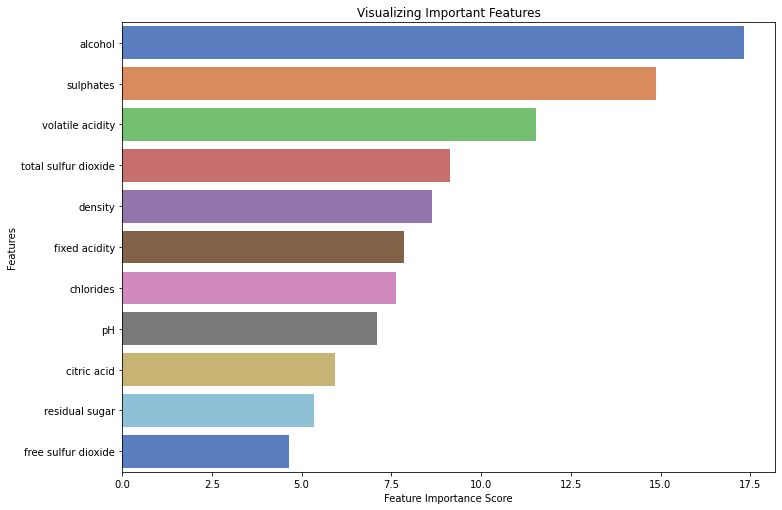

In [103]:
# Creating a bar plot
sns.barplot(x=result['feature_imp'], y=result['X_train.columns'],data=result,palette="muted")
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In this way, we can understand that the 5 main resources that impact the quality of a wine are the amount of alcohol, sulphates, volatile acidity and total sulfur dioxide

But considerably, alcohol proved to be the most statistically important variable.